In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import os
import json
import pandas as pd
import numpy as np
from datasets import load_dataset

import matplotlib.pyplot as plt
import seaborn as sns

from tqdm import tqdm

if os.path.basename(os.getcwd()) == "notebooks":
    os.chdir(os.path.dirname(os.getcwd()))

import debias_vsi as dv

In [3]:
df = dv.get_vsi_with_scores()
df

Evaluating /Users/ebrown/workspace/vsibench_debiased_internal/data/ref_evals/bld_sims_3q_10k_blind.jsonl: 100%|██████████| 5130/5130 [00:00<00:00, 14344.12it/s]
Evaluating /Users/ebrown/workspace/vsibench_debiased_internal/data/ref_evals/blk_sims_3q_10k_blind.jsonl: 100%|██████████| 5130/5130 [00:00<00:00, 15805.48it/s]
Evaluating /Users/ebrown/workspace/vsibench_debiased_internal/data/ref_evals/cambrian-s.jsonl: 100%|██████████| 5130/5130 [00:00<00:00, 15904.74it/s]
Evaluating /Users/ebrown/workspace/vsibench_debiased_internal/data/ref_evals/cambrian-s_blind.jsonl: 100%|██████████| 5130/5130 [00:00<00:00, 15994.17it/s]
Evaluating /Users/ebrown/workspace/vsibench_debiased_internal/data/ref_evals/gemini-1.5_pro.jsonl: 100%|██████████| 5156/5156 [00:00<00:00, 13813.37it/s]
Evaluating /Users/ebrown/workspace/vsibench_debiased_internal/data/ref_evals/llava_vid_7b.jsonl: 100%|██████████| 5156/5156 [00:00<00:00, 14775.63it/s]
Evaluating /Users/ebrown/workspace/vsibench_debiased_internal/data

Loaded 5130 files. Loading VSI-Bench...


,id,dataset,scene_name,question_type,question,ground_truth,options,bld_sims_3q_10k_blind,blk_sims_3q_10k_blind,cambrian-s,...,rgb_sims_3q_25k,rgb_sims_3q_25k_blind,rgb_sims_manV2_5k,rgb_sims_manV2_5k_blind,vsi_train_10k,vsi_train_10k_blind,vsi_train_50k,vsi_train_50k_blind,vsi_train_5k,vsi_train_5k_blind
0,0,arkitscenes,41069025,object_counting,How many table(s) are in this room?,4,None,0.0,0.0,0.1,...,0.1,0.0,0.1,0.0,0.1,0.1,0.1,0.1,0.1,0.1
1,1,arkitscenes,41069025,object_counting,How many chair(s) are in this room?,2,None,0.1,0.1,1.0,...,0.1,0.1,0.1,0.1,1.0,1.0,1.0,1.0,1.0,1.0
2,2,arkitscenes,41069043,object_counting,How many table(s) are in this room?,2,None,0.1,0.1,1.0,...,1.0,0.1,1.0,0.1,1.0,1.0,1.0,1.0,1.0,1.0
3,3,arkitscenes,41125700,object_counting,How many sofa(s) are in this room?,2,None,0.1,0.1,1.0,...,0.1,0.1,0.1,0.1,1.0,1.0,1.0,1.0,1.0,1.0
4,4,arkitscenes,41125700,object_counting,How many table(s) are in this room?,3,None,0.0,0.0,0.4,...,0.4,0.0,0.4,0.0,0.4,0.4,0.4,0.4,0.4,0.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5125,5151,scannet,scene0196_00,route_planning,You are a robot beginning at the trash bin nea...,C,"[A. Turn Right, Turn Left, B. Turn Right, Turn...",0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5126,5152,scannet,scene0378_01,route_planning,You are a robot beginning at the door and faci...,A,"[A. Turn Left, Turn Left, Turn Left, B. Turn L...",0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5127,5153,arkitscenes,47331654,route_planning,You are a robot beginning at the heater and fa...,D,"[A. Turn Left, Turn Right, B. Turn Back, Turn ...",0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5128,5154,arkitscenes,42445026,route_planning,You are a robot beginning at the doorframe and...,C,"[A. Turn Left, B. Turn Back, C. Turn Right]",1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0


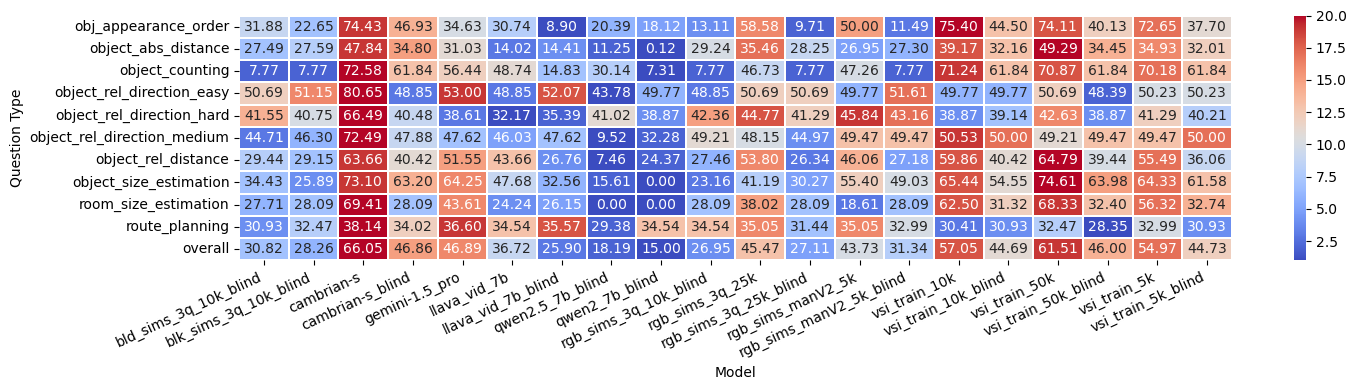

In [4]:
dv.visualize_model_scores(df);

In [5]:
df["question_type"].value_counts()

question_type
object_size_estimation         953
object_abs_distance            834
object_rel_distance            710
obj_appearance_order           618
object_counting                565
object_rel_direction_medium    378
object_rel_direction_hard      373
room_size_estimation           288
object_rel_direction_easy      217
route_planning                 194
Name: count, dtype: int64

## Room Size

In [6]:
qdf = df[df["question_type"] == "room_size_estimation"].copy()
qdf["ground_truth_num"] = pd.to_numeric(qdf["ground_truth"], errors="coerce")

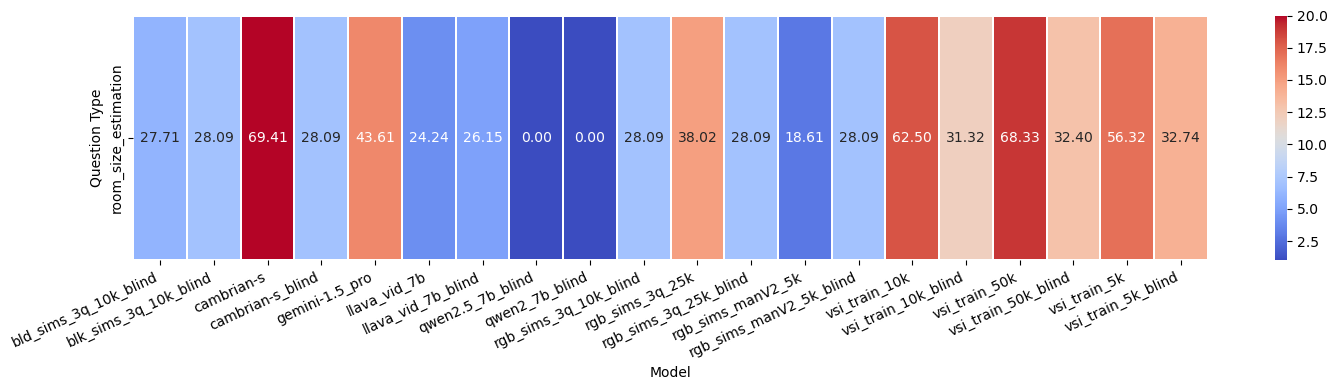

In [7]:
dv.visualize_model_scores(qdf);

In [8]:
i=0
qdf["question"].iloc[i], qdf["ground_truth"].iloc[i],

('What is the size of this room (in square meters)? \nIf multiple rooms are shown, estimate the size of the combined space.',
 '26.4')

In [9]:
qdf.iloc[i].to_dict()

{'id': 530,
 'dataset': 'arkitscenes',
 'scene_name': '41069025',
 'question_type': 'room_size_estimation',
 'question': 'What is the size of this room (in square meters)? \nIf multiple rooms are shown, estimate the size of the combined space.',
 'ground_truth': '26.4',
 'options': None,
 'bld_sims_3q_10k_blind': 0.0,
 'blk_sims_3q_10k_blind': 0.0,
 'cambrian-s': 0.9,
 'cambrian-s_blind': 0.0,
 'gemini-1.5_pro': 0.4,
 'llava_vid_7b': 0.0,
 'llava_vid_7b_blind': 0.0,
 'qwen2.5_7b_blind': 0.0,
 'qwen2_7b_blind': 0.0,
 'rgb_sims_3q_10k_blind': 0.0,
 'rgb_sims_3q_25k': 0.0,
 'rgb_sims_3q_25k_blind': 0.0,
 'rgb_sims_manV2_5k': 0.0,
 'rgb_sims_manV2_5k_blind': 0.0,
 'vsi_train_10k': 0.8,
 'vsi_train_10k_blind': 0.0,
 'vsi_train_50k': 0.9,
 'vsi_train_50k_blind': 0.1,
 'vsi_train_5k': 0.9,
 'vsi_train_5k_blind': 0.2,
 'ground_truth_num': 26.4}

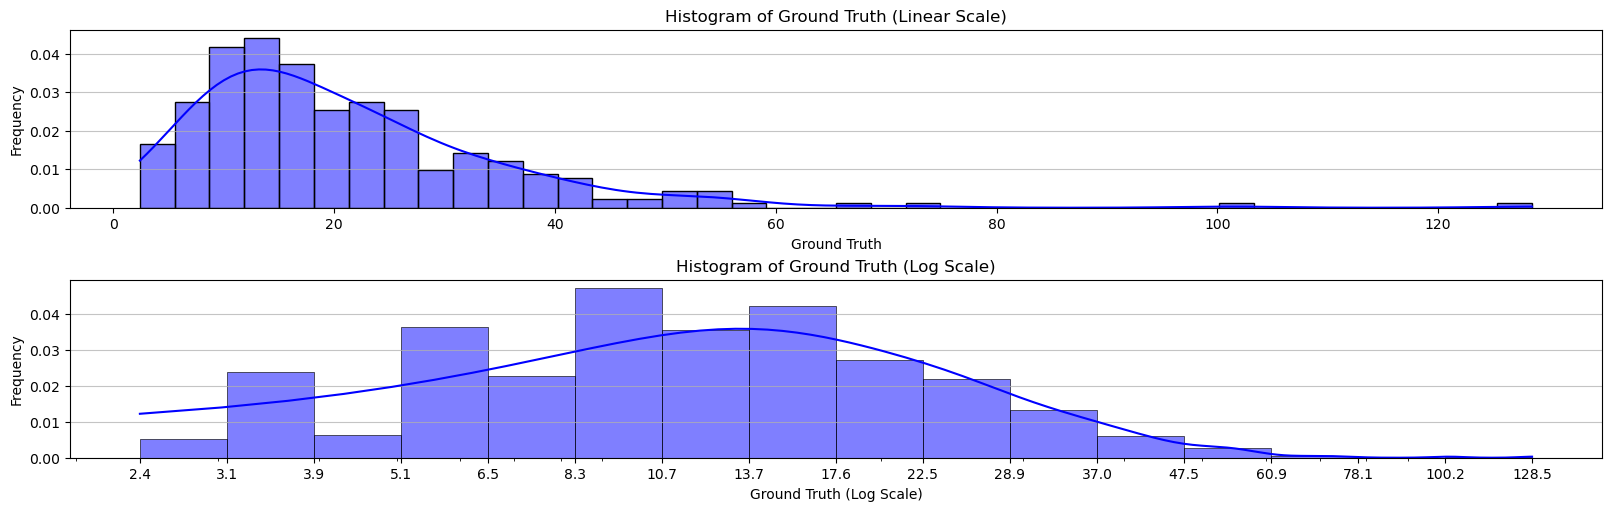

In [10]:
fig, axes = plt.subplots(2, 1, figsize=(16, 5), constrained_layout=True)

# First plot: Linear scale
gt_series = qdf['ground_truth_num'].dropna()
sns.histplot(gt_series, bins=40, kde=True, color='blue', edgecolor='black', ax=axes[0], stat='density')
axes[0].set_xlabel('Ground Truth')
axes[0].set_ylabel('Frequency')
axes[0].set_title('Histogram of Ground Truth (Linear Scale)')
axes[0].grid(axis='y', alpha=0.75)

# Second plot: Log scale
bins = np.logspace(np.log10(gt_series.min()), np.log10(gt_series.max()), 17)
sns.histplot(gt_series, bins=bins, kde=True, color='blue', edgecolor='black', ax=axes[1], stat='density')
axes[1].set_xscale('log')
axes[1].set_xlabel('Ground Truth (Log Scale)')
axes[1].set_ylabel('Frequency')
axes[1].set_title('Histogram of Ground Truth (Log Scale)')
axes[1].grid(axis='y', alpha=0.75)

# Set x-ticks for the log scale plot
ticks = bins
axes[1].set_xticks(ticks)
axes[1].set_xticklabels([f"{tick:.1f}" for tick in ticks])

plt.show()


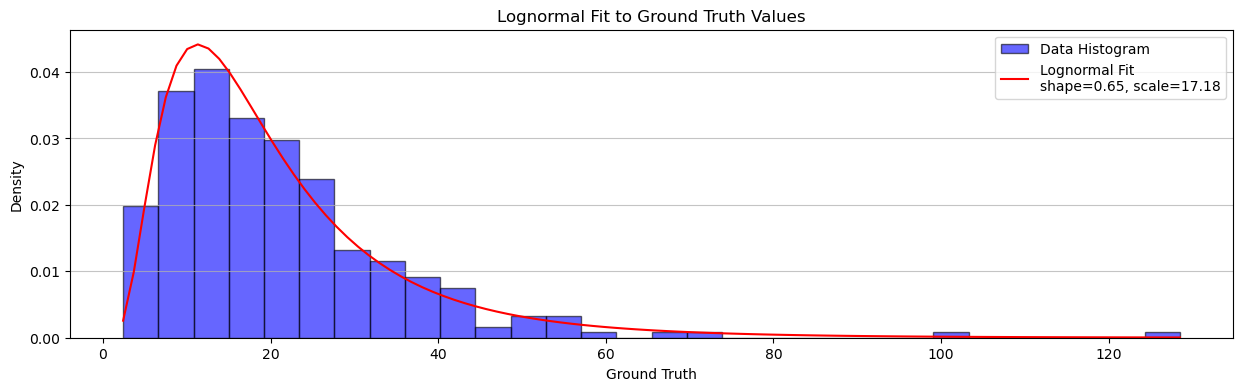

Lognormal fit: shape=0.65, loc=0.00, scale=17.18
Kolmogorov-Smirnov Test Statistic: 0.0348, p-value: 0.8640


In [11]:
from scipy.stats import lognorm
import numpy as np
from scipy.stats import kstest

# Extract ground truth values and ensure they are positive
ground_truth_values = qdf['ground_truth_num'].dropna()
# ground_truth_values = ground_truth_values[ground_truth_values > 0]

# Fit a lognormal distribution to the data
shape, loc, scale = lognorm.fit(ground_truth_values, floc=0)  # Fix location to 0 for lognormal

# Generate the fitted distribution
x = np.linspace(ground_truth_values.min(), ground_truth_values.max(), 100)
pdf = lognorm.pdf(x, shape, loc, scale)

# Plot the histogram of the data and the fitted distribution
plt.figure(figsize=(15, 4))
plt.hist(ground_truth_values, bins=30, density=True, alpha=0.6, color='blue', edgecolor='black', label='Data Histogram')
plt.plot(x, pdf, 'r-', label=f'Lognormal Fit\nshape={shape:.2f}, scale={scale:.2f}')
plt.xlabel('Ground Truth')
plt.ylabel('Density')
plt.title('Lognormal Fit to Ground Truth Values')
plt.legend()
plt.grid(axis='y', alpha=0.75)
plt.show()

# Evaluate goodness of fit using the Kolmogorov-Smirnov test
ks_stat, p_value = kstest(ground_truth_values, 'lognorm', args=(shape, loc, scale))
print(f"Lognormal fit: shape={shape:.2f}, loc={loc:.2f}, scale={scale:.2f}")
print(f"Kolmogorov-Smirnov Test Statistic: {ks_stat:.4f}, p-value: {p_value:.4f}")

In [12]:
qdf["ground_truth_num"].describe()

count    288.000000
mean      21.067361
std       14.714788
min        2.400000
25%       11.150000
50%       17.500000
75%       26.675000
max      128.500000
Name: ground_truth_num, dtype: float64

In [13]:
len(qdf)

288

In [14]:
pd.set_option('display.max_rows', 100)
budget = 88

Removed 88 samples from the dataset. Now 200 samples remain.


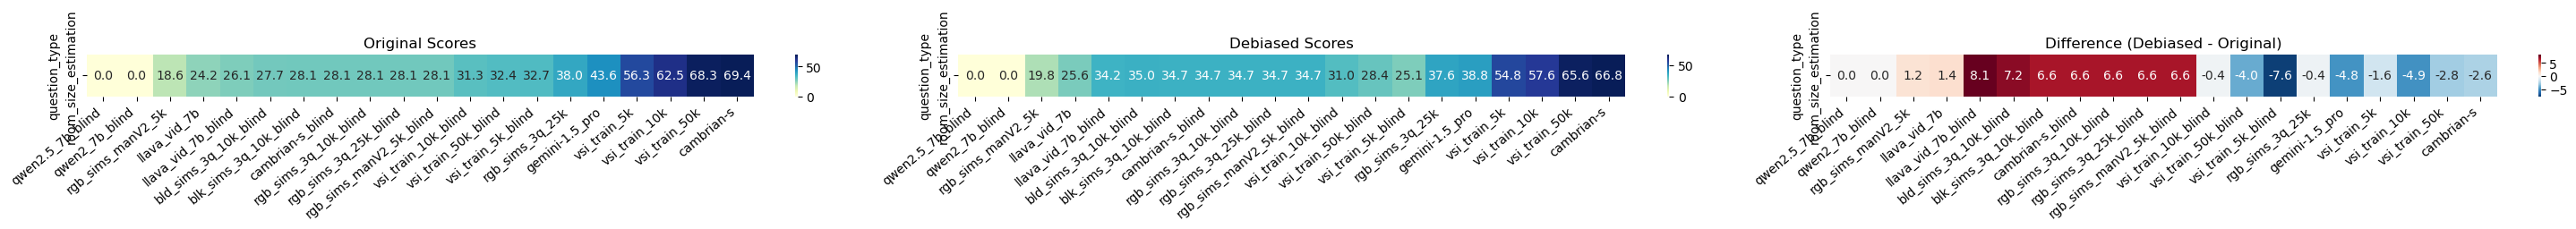

In [15]:
ids = dv.filter_room_size_estimation_v1(qdf, budget=budget, logscale=False)
deb_qdf = qdf.loc[~qdf["id"].isin(ids)]
removed_qdf = qdf.loc[qdf["id"].isin(ids)]
print(f"Removed {len(removed_qdf)} samples from the dataset. Now {len(deb_qdf)} samples remain.")
dv.visualize_debiasing_impact(qdf, deb_qdf);

Removed 88 samples from the dataset. Now 200 samples remain.


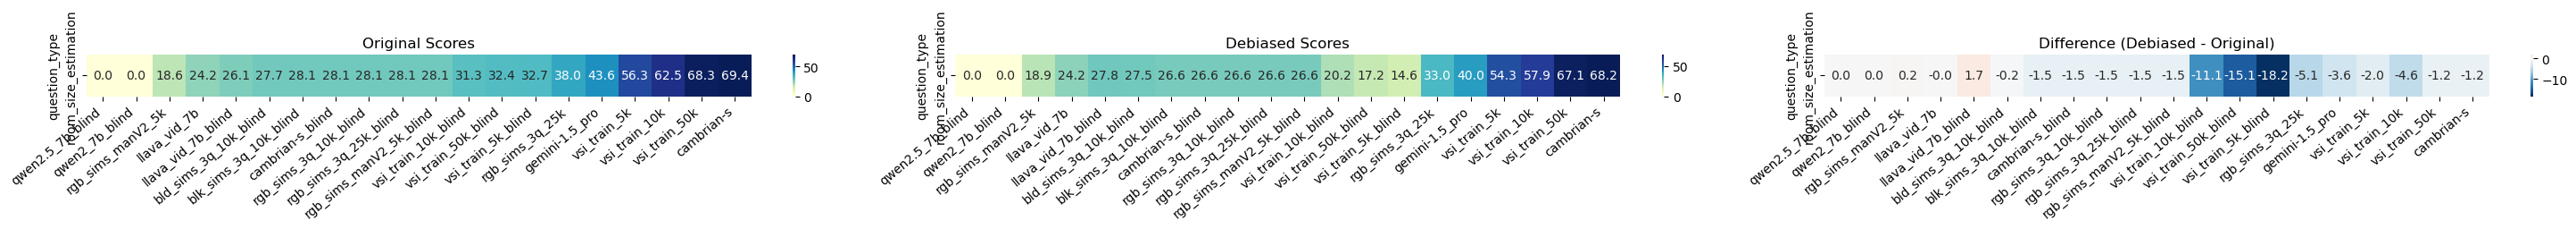

In [16]:
ids = dv.filter_room_size_estimation_v1(qdf, budget=budget, logscale=True)
deb_qdf = qdf.loc[~qdf["id"].isin(ids)]
removed_qdf = qdf.loc[qdf["id"].isin(ids)]
print(f"Removed {len(removed_qdf)} samples from the dataset. Now {len(deb_qdf)} samples remain.")
dv.visualize_debiasing_impact(qdf, deb_qdf);

Removed 88 samples from the dataset. Now 200 samples remain.


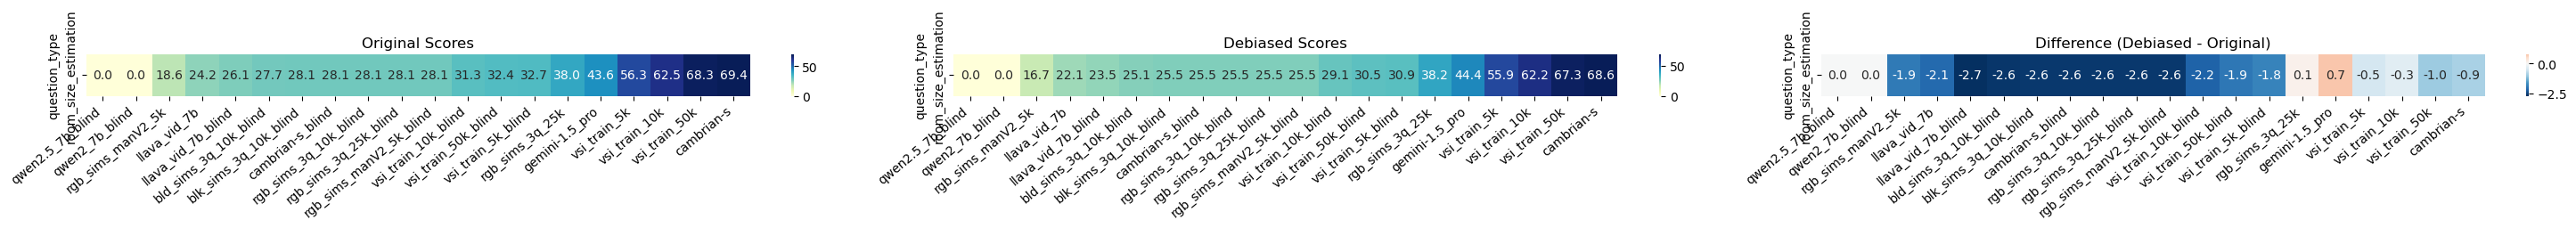

In [17]:
ids = dv.filter_room_size_estimation_sampled(qdf, budget=budget, seed=42)
deb_qdf = qdf.loc[~qdf["id"].isin(ids)]
removed_qdf = qdf.loc[qdf["id"].isin(ids)]
print(f"Removed {len(removed_qdf)} samples from the dataset. Now {len(deb_qdf)} samples remain.")
dv.visualize_debiasing_impact(qdf, deb_qdf);

Removed 88 samples from the dataset. Now 200 samples remain.


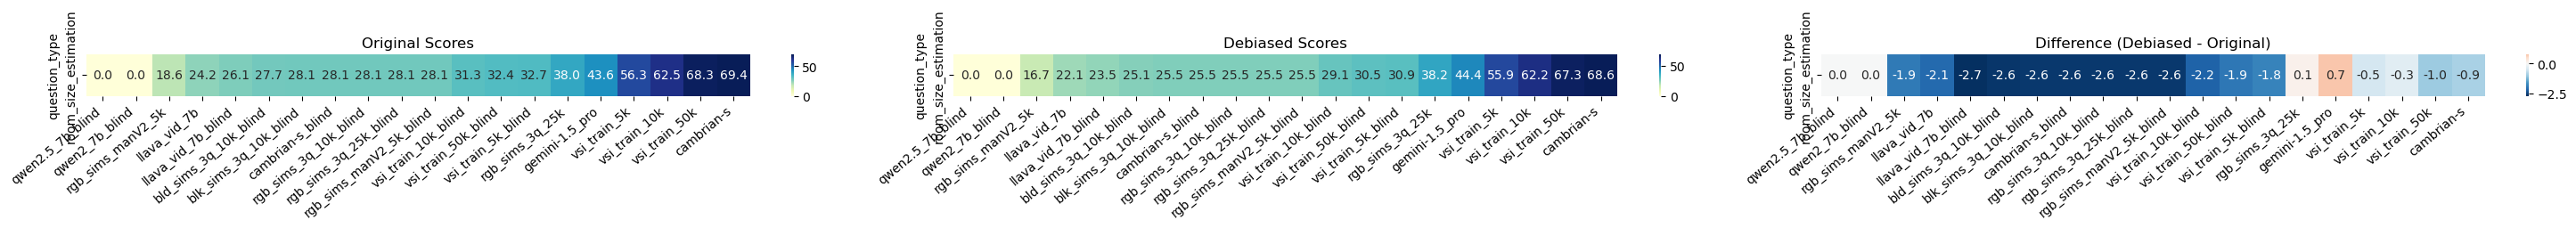

In [18]:
ids = dv.filter_room_size_estimation_sampled(qdf, budget=budget, seed=42)
deb_qdf = qdf.loc[~qdf["id"].isin(ids)]
removed_qdf = qdf.loc[qdf["id"].isin(ids)]
print(f"Removed {len(removed_qdf)} samples from the dataset. Now {len(deb_qdf)} samples remain.")
dv.visualize_debiasing_impact(qdf, deb_qdf);

Removed 88 samples from the dataset. Now 200 samples remain.


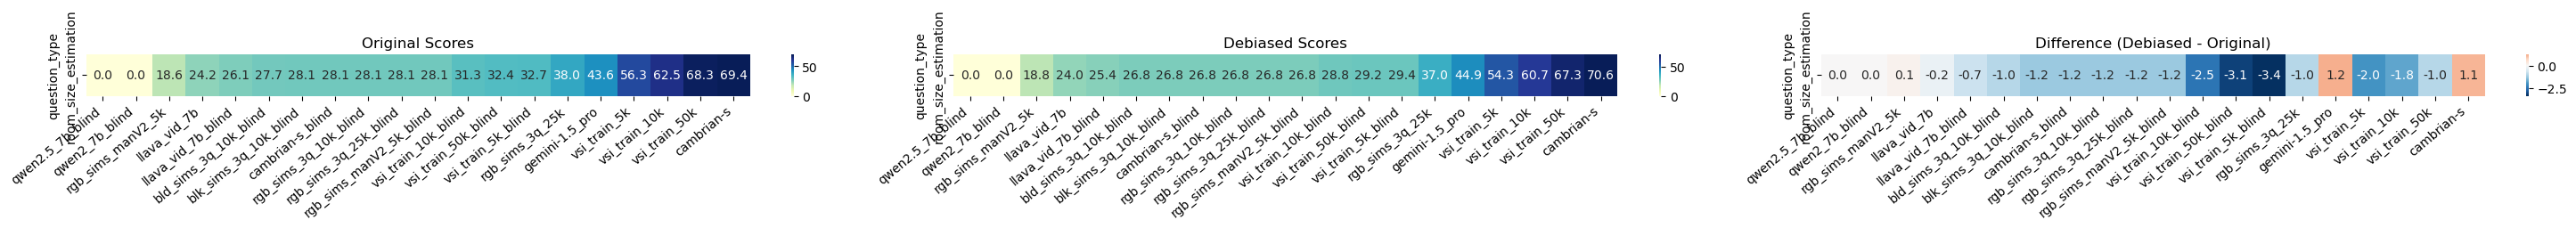

In [19]:
ids = dv.filter_room_size_estimation_sampled(qdf, budget=budget, seed=2, alpha=2)
deb_qdf = qdf.loc[~qdf["id"].isin(ids)]
removed_qdf = qdf.loc[qdf["id"].isin(ids)]
print(f"Removed {len(removed_qdf)} samples from the dataset. Now {len(deb_qdf)} samples remain.")
dv.visualize_debiasing_impact(qdf, deb_qdf);

Removed 88 samples from the dataset. Now 200 samples remain.


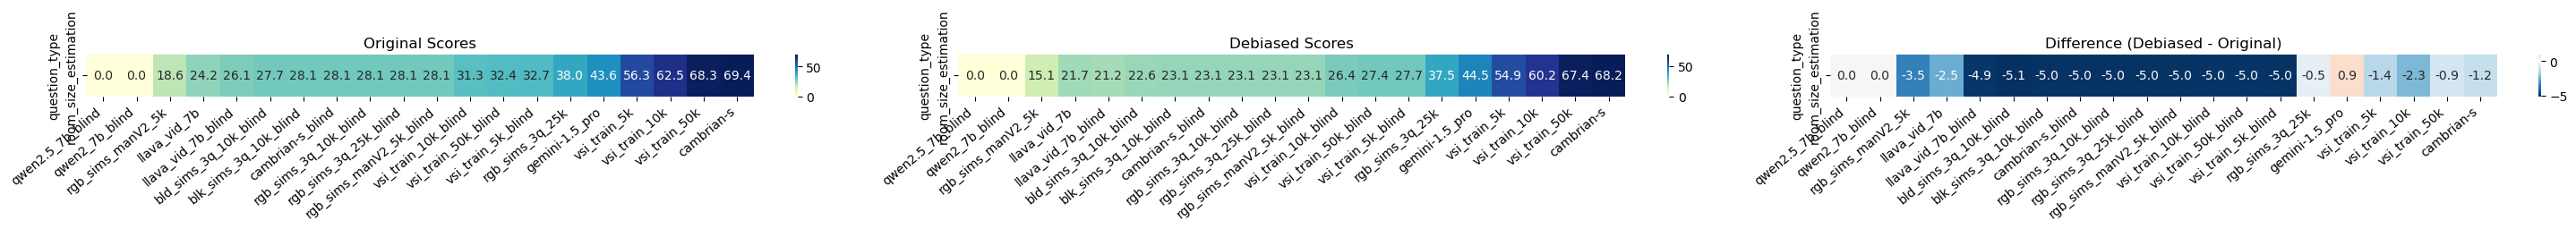

In [20]:
ids = dv.filter_room_size_estimation_sampled_pdf(qdf, budget=budget, seed=42, alpha=1)
deb_qdf = qdf.loc[~qdf["id"].isin(ids)]
removed_qdf = qdf.loc[qdf["id"].isin(ids)]
print(f"Removed {len(removed_qdf)} samples from the dataset. Now {len(deb_qdf)} samples remain.")
dv.visualize_debiasing_impact(qdf, deb_qdf);

Removed 88 samples from the dataset. Now 200 samples remain.


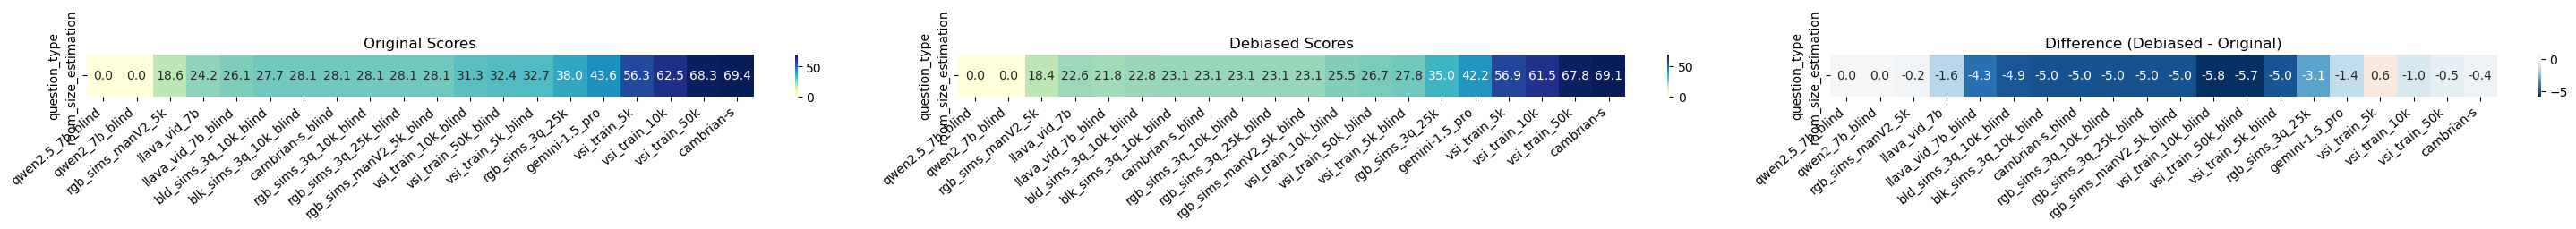

In [21]:
ids = dv.filter_room_size_estimation_sampled_pdf(qdf, budget=budget, seed=0, alpha=1)
deb_qdf = qdf.loc[~qdf["id"].isin(ids)]
removed_qdf = qdf.loc[qdf["id"].isin(ids)]
print(f"Removed {len(removed_qdf)} samples from the dataset. Now {len(deb_qdf)} samples remain.")
dv.visualize_debiasing_impact(qdf, deb_qdf);

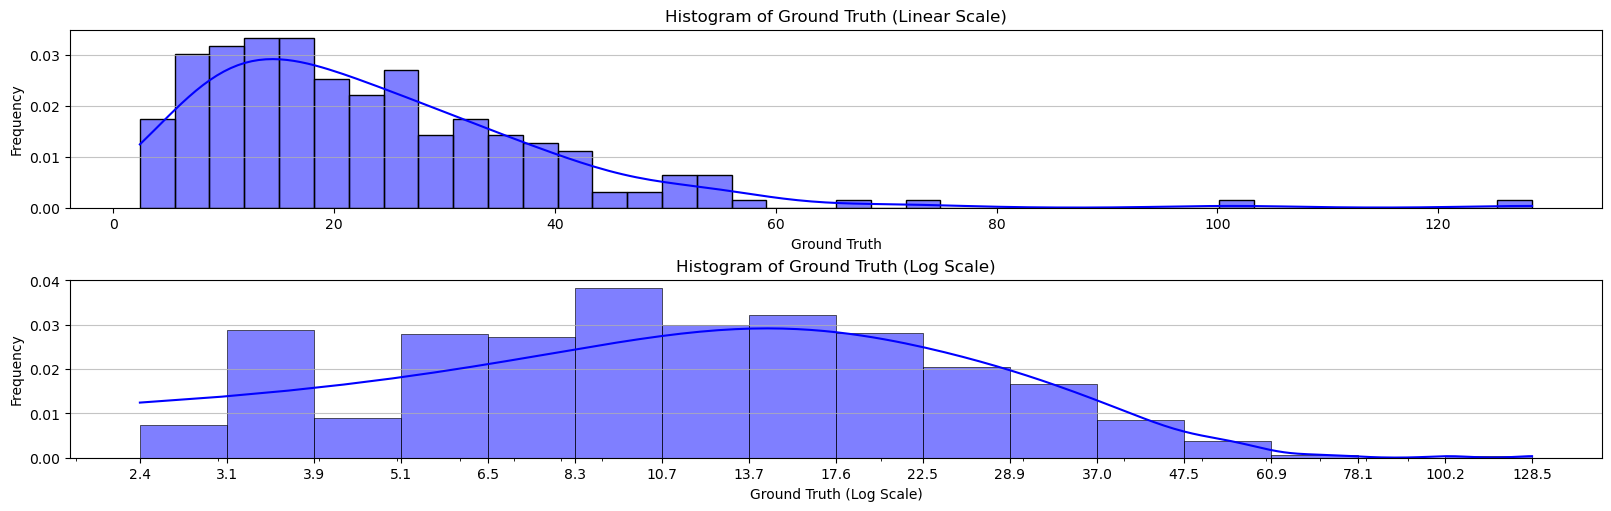

In [22]:
fig, axes = plt.subplots(2, 1, figsize=(16, 5), constrained_layout=True)

# First plot: Linear scale
# gt_series = removed_qdf['ground_truth_num'].dropna()
gt_series = deb_qdf['ground_truth_num'].dropna()
sns.histplot(gt_series, bins=40, kde=True, color='blue', edgecolor='black', ax=axes[0], stat='density')
axes[0].set_xlabel('Ground Truth')
axes[0].set_ylabel('Frequency')
axes[0].set_title('Histogram of Ground Truth (Linear Scale)')
axes[0].grid(axis='y', alpha=0.75)

# Second plot: Log scale
bins = np.logspace(np.log10(gt_series.min()), np.log10(gt_series.max()), 17)
sns.histplot(gt_series, bins=bins, kde=True, color='blue', edgecolor='black', ax=axes[1], stat='density')
axes[1].set_xscale('log')
axes[1].set_xlabel('Ground Truth (Log Scale)')
axes[1].set_ylabel('Frequency')
axes[1].set_title('Histogram of Ground Truth (Log Scale)')
axes[1].grid(axis='y', alpha=0.75)

# Set x-ticks for the log scale plot
ticks = bins
axes[1].set_xticks(ticks)
axes[1].set_xticklabels([f"{tick:.1f}" for tick in ticks])

plt.show()


In [23]:
qdf["log_ground_truth_num"] = np.log10(qdf["ground_truth_num"])
qdf["log_ground_truth_num"].describe()

count    288.000000
mean       1.235141
std        0.282250
min        0.380211
25%        1.047262
50%        1.243038
75%        1.426099
max        2.108903
Name: log_ground_truth_num, dtype: float64

In [24]:
a = dv.evaluate_models(qdf.loc[qdf["id"].isin(ids)])
b = dv.evaluate_models(qdf.loc[~qdf["id"].isin(ids)])
c = dv.evaluate_models(qdf)
d = b - c
# concat the dfs
# pd.concat([a, b], axis=0, ignore_index=True).rename(index={0: "Removed", 1: "Debiased"})
# pd.concat([a, b, c], axis=0, ignore_index=True).rename(index={0: "Removed", 1: "Debiased", 2: "Original"})
pd.concat([a, b, c, d], axis=0, ignore_index=True).rename(index={0: "Removed", 1: "Debiased", 2: "Original", 3: "Difference"}).T.sort_values("Difference")

,Removed,Debiased,Original,Difference
vsi_train_10k_blind,44.431818,25.55,31.319444,-5.769444
vsi_train_50k_blind,45.454545,26.65,32.395833,-5.745833
rgb_sims_3q_10k_blind,39.545455,23.05,28.090278,-5.040278
blk_sims_3q_10k_blind,39.545455,23.05,28.090278,-5.040278
cambrian-s_blind,39.545455,23.05,28.090278,-5.040278
rgb_sims_manV2_5k_blind,39.545455,23.05,28.090278,-5.040278
rgb_sims_3q_25k_blind,39.545455,23.05,28.090278,-5.040278
vsi_train_5k_blind,44.090909,27.75,32.743056,-4.993056
bld_sims_3q_10k_blind,38.863636,22.80,27.708333,-4.908333
llava_vid_7b_blind,36.022727,21.80,26.145833,-4.345833


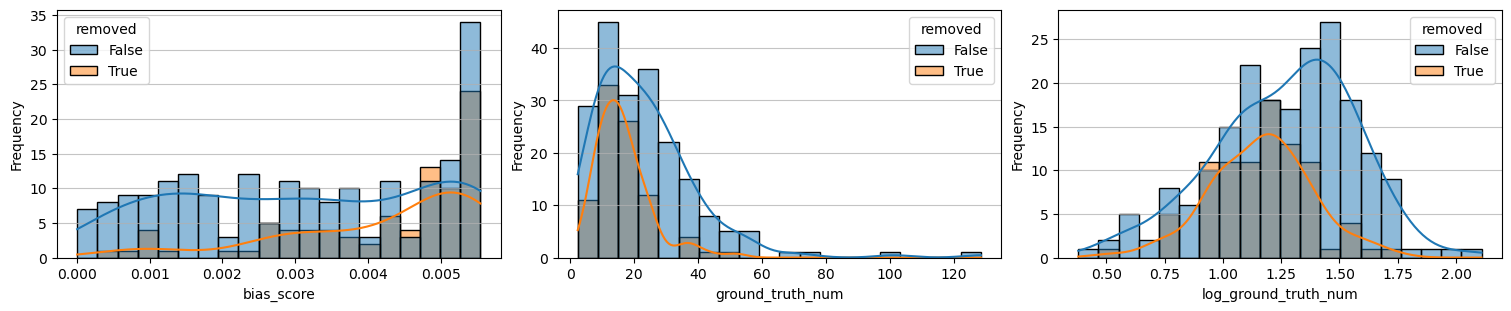

In [25]:
budget = 88

remove_ids = dv.filter_room_size_estimation_sampled_pdf(qdf, budget)
df_filtered = dv.get_room_size_estimation_score_pdf(qdf)
df_sorted = df_filtered.sort_values("bias_score", ascending=False)
df_sorted["removed"] = df_sorted["id"].isin(remove_ids)


scores = [
    "bias_score",
    "ground_truth_num",
    "log_ground_truth_num",
]

# Visualize the distribution of scores in subplots
fig, axes = plt.subplots(1, len(scores), figsize=(5*len(scores), 3), constrained_layout=True)
if len(scores) == 1:
    axes = [axes]  # Ensure axes is iterable even if there's only one score

for i, score in enumerate(scores):
    sns.histplot(data=df_sorted, x=score, bins=20, kde=True, hue="removed", ax=axes[i])
    axes[i].set_ylabel("Frequency")
    axes[i].grid(axis='y', alpha=0.75)
plt.show()